# **Machine Learning Breast Cancer Data**

Engineer Cloud Computing

**Authors:**

Pasan Kamburugamuwa,
Olusina Ojewola,
Courtney Payton


**Summary**

Throughout this notebook, first we will apply preprocessing to the data by dropping any null values, removing unneccessary columns, and renaming the diagnosis field to represent malignant and benign with numerical type values. Exploratory Data Analysis will be performed to show correlations, and visualizations of the dataset. Finally, Machine learning algorithms of logistic regression, KNN, and Random Forest will be applied on this classification task to compare accuracies.

**Import Statements**

In [ ]:
!pip install summarytools

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from summarytools import dfSummary

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## **1.** Preprocessing

In [15]:
colab_path = '/content/drive/MyDrive/Cloud_Computing/Cloud_Computing_Project'
df = pd.read_csv(colab_path + '/Midterm/data.csv')

df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Only need to run below once

In [17]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)



In [16]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
df.head(15) ##Double checking changing diagnosis values worked

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [20]:
df.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

See if any null values need to be addressed

In [22]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## **2.** Exploratory Data Analysis

In [27]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,diagnosis[int64],1. 02. 1,357 (62.7%)212 (37.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bQWrDMBCF4VExodlIGIMP40P0sD2EbmOMtWhCNuqiZ8gb1fN/J5iEH0OCX+q9G6CQzOxuZjfvQ4J79d4f3ke827Qsy1fOefY+JLLW2pFS+r56cFPOed627VFKeXofE9F5np+11nnf95uZXTs2M7NSynNd1x/vYwK7ex+g8OF9AOIgNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBZjL7e4HP+5CoIn33U2vtqLXOFuQFvhG11g4ze3nf8W4MXsYQYvCSmPJBJdKTLcTTY2RhpnxR5nIjCzHlizSXG1mkKR+/tp3xpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskAkx5bv65/svwkz5oszlRsbgBTK/Cltq36Cso0UAAAAASUVORK5CYII="">",0(0.0%)
2,radius_mean[float64],Mean (sd) : 14.1 (3.5)min < med < max:7.0 < 13.4 < 28.1IQR (CV) : 4.1 (4.0),456 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACpElEQVR4nO3du47aQBSA4TOwIHORLUQEHU3KSCkoeYg8bB4hSDzBtqnokCxkhIOFMU4RbZpluYztZc7o//pZu/hlLTBnbMqyFMB1rWffAHCPl2ffwDXGmJ6IdC2XH8uyPNR5P3geZ0M1xvTG4/GPMAxHNut3u93WGPOTWP3gbKgi0g3DcLRYLA5RFGWPLEySJFitVqM4jrsiQqgecDlUERGJoiibTCZ/LJb2ar8ZPA0fpqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoYLzO/xtFUXREZHQGGP7JxgOdIiXoaZp2snz/PtsNmu32+2H5q3eMBzoFi9DPR6PL0EQ9OfzeTadTrePrmc40D1ehvpmMBjYDgaKMBzoFD5MQQVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSo0Og2v4qv3wnP53OnzvuBXo2FWvX1O3meB0VRfMuy7JeI2O4phSeafKJav35HRGS9Xo9eX1/7p9Op3cTNQZfGd/jbvn5nu92ywx7/8WEKKhAqVCBUqECoUMHrcekqKp60wikrNSPUC6qetMIpK/Uj1AuqnLSSJEmwXC4ncRx/McbsbC5P4O8R6hU2J63wNG4Godas6tOYM68uI9SGVDj3il/kLiBUx3Cu62WE6hDOdf0YoTqEc10/RqgO4lzX9/gJFSoQKlQgVKhw83/UCgN6DOehNldDrTKgx3Ae6nTriWo9oMdwHup019dTNgN6DOehTnyP6hlfN3wTqkd83mJIqB558oZvkX9fd54t1159mt8VapIkwaNX3e/3gYhImqbBZrPpf+Z6rdeu675tHA6HSk/joig6aZp+HQ6Hv1utVv7o+ltP87+YOH09ERiPOgAAAABJRU5ErkJggg=="">",0(0.0%)
3,texture_mean[float64],Mean (sd) : 19.3 (4.3)min < med < max:9.7 < 18.8 < 39.3IQR (CV) : 5.6 (4.5),479 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3csY7aQBRA0TdhQQZW9iIi6NxSREpBSZM/yMemTZeCHok/oEMCbISzXgw41XYJCzN28Bvd08/uFFdoGDHPlGUpQNN9evQGgFs8PXoD1xhjuiLSsVx+LMvytcr94HEaG6oxpjscDr+HYTiwWb/f73fGmB/E6ofGhioinTAMB7PZ7DWKovyehWmaBvP5fLDZbDoiQqgeaHKoIiISRVE+Go1+WyztVr4ZPEzjQ7V1Pp/bIhIaY2z/BGfcBvEy1CzL2kVRfI3juNVqte46NrzjjNssXoZ6PB6fgiDoTafTfDwe7+5dzxm3ebwM9V2/37c934pwxm0ULvyhAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKFCrb/wdxwgEV4ul3aV+4FetYXqOkCiKIrgfD5/yfP8l4jYPieBJ+r8RLUeICEislqtBsvlsnc6nVp1bA661P64z3aAxG63e+jjOse5AMwEqJjXr1Btuc4FYCZA9Qj1L1zmAjAToB6EeoXDXABmAlSMe1SoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBpyg14AVr9Qi1YrxgrQehVowXrPUg1JrwgrVafJmCCoQKFQgVKhAqVODLVMM43sGKeHoPS6gN4noHK+LvPeyHoTqMN2e0+Z1c7mBF/L6HvRqqy3hzRpvbc7iDFfH0HvajT1Tr8eaMNkeVbjqj2ow3f/Roc/iF6ymowLd+z/j6E0NC9Yjr9VaSJAdjzE8RsboakxpDvynUNE2De//w4XAIRESyLAvW63Xvf67X+r9d973dbp+DIOhNJhPz8vLyds/aJEmeF4vFtziOP9ve4TqG/laW5T/X/QHKmWi2sKL6OQAAAABJRU5ErkJggg=="">",0(0.0%)
4,perimeter_mean[float64],Mean (sd) : 92.0 (24.3)min < med < max:43.8 < 86.2 < 188.5IQR (CV) : 28.9 (3.8),522 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACn0lEQVR4nO3cu47aQBSA4TOwIHORLUQEHU3KSCkoeYg8bB4hSDwBbSo6JAsZ4WBhjFNtmrBcxuNljvV//SxT/PLalueYsiwF8F3r1RsAHvH26g3cYozpiUjXcvmpLMujy/3gdbwN1RjTG4/HP8IwHNms3+/3O2PMT2JtBm9DFZFuGIajxWJxjKIoe2ZhkiTBarUaxXHcFRFCbQCfQxURkSiKsslk8sdiac/5ZvAyPExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpU8P4Uqq2iKDoiEhpjbP8

### 2.1 Box Plot

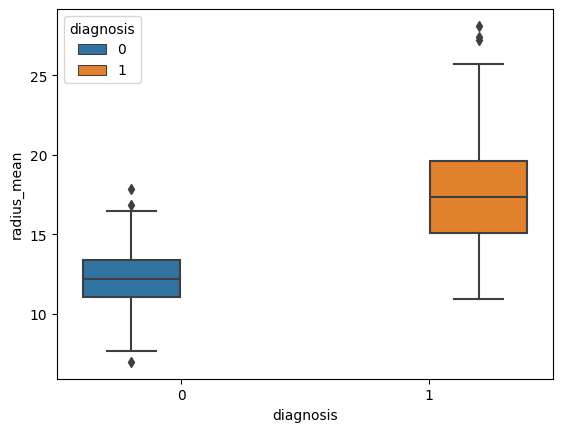

In [36]:
sns.boxplot(x='diagnosis', y='radius_mean', hue='diagnosis', data=df)
plt.show()

### 2.2 Scatter Plot Tumor Measurements Benign vs. Malignant

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

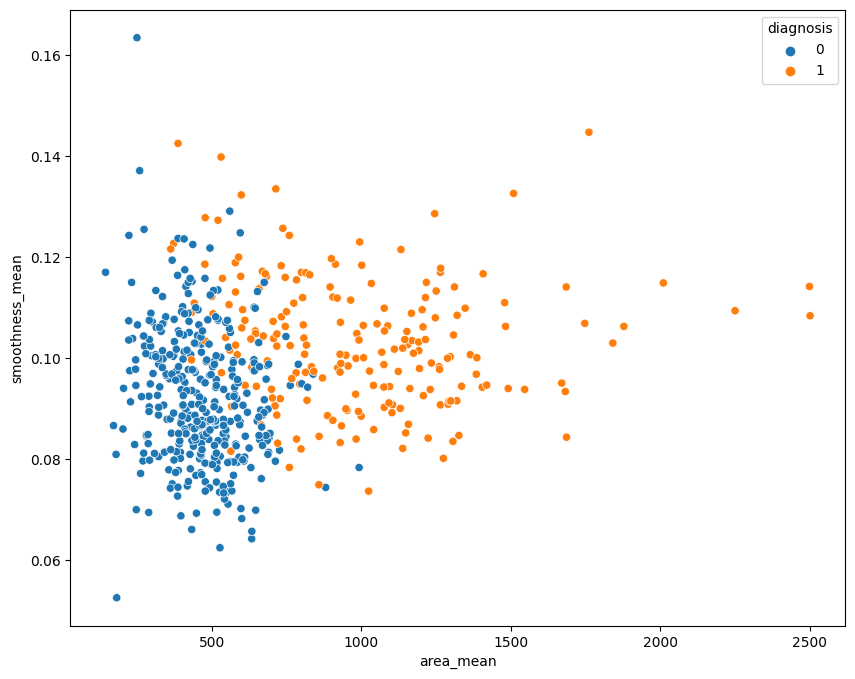

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = df)

### 2.3 Correlation Map

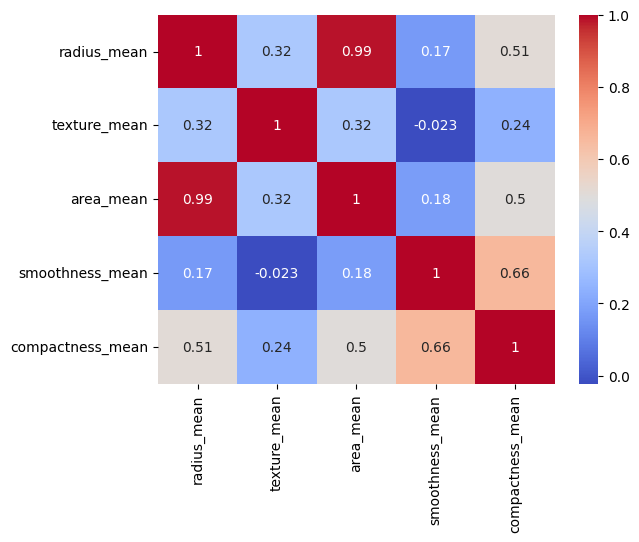

In [37]:
corr = df[['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### 2.4 Finding what values have the highest correlation with diagnosis

Here, I thought it was particularly interesting that concavity showed the highest correlation

In [39]:
corr_matrix = df.corr()
correlation = corr_matrix['diagnosis'].apply(abs).sort_values(ascending=False)
print(correlation)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

## **3.** Classification Task

In [40]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

### 3.1 Splitting Data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [44]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3.2 Logistic Regression

In [48]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)

### 3.3 K-Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

### 3.4 Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

## **4.** Results

In [49]:
results = {
    'Logistic Regression': {'Accuracy': lr_accuracy, 'Classification Report': lr_report},
    'k-Nearest Neighbors': {'Accuracy': knn_accuracy, 'Classification Report': knn_report},
    'Random Forest': {'Accuracy': rf_accuracy, 'Classification Report': rf_report}
}

sorted_results = sorted(results.items(), key=lambda x: x[1]['Accuracy'])

for model, metrics in sorted_results:
    print(f"Model: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Classification Report:\n{metrics['Classification Report']}\n")

Model: k-Nearest Neighbors
Accuracy: 0.9591
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Model: Random Forest
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171


Model: Logistic Regression
Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0